Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read The Dataset

In [2]:
df=pd.read_csv('C:/Users/DELL/Downloads/IRIS Flower.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


 Data Preprocessing

In [6]:
df.isnull().sum() #Handle Null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.duplicated().sum()  # Handling Duplicates

3

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

Exploratory Data Analysis (EDA)

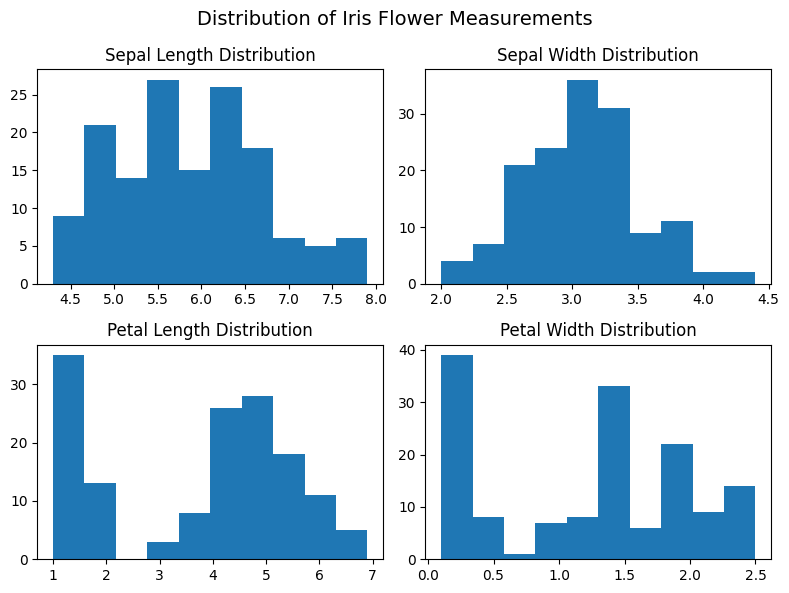

In [11]:
# Distribution of Numerical Variables
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

plt.subplot(2, 2, 1)
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')
plt.tight_layout()
plt.show()


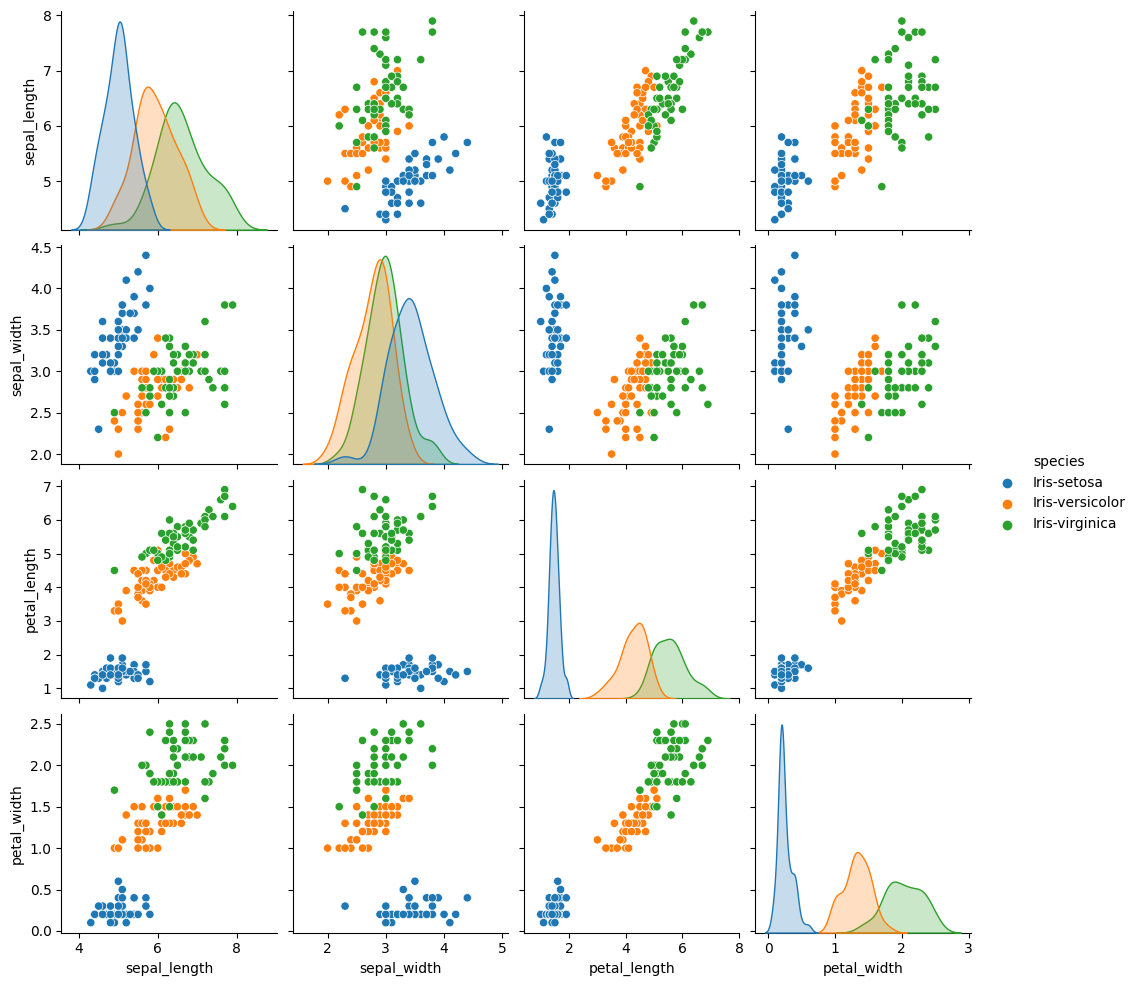

In [12]:
sns.pairplot(df, hue='species')

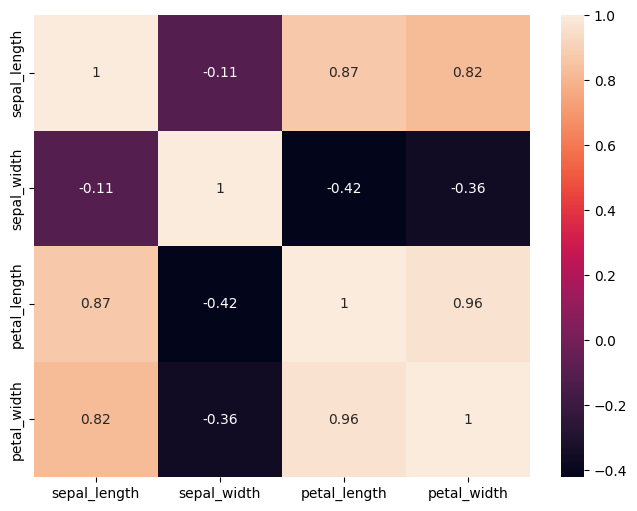

In [13]:
plt.figure(figsize=(8, 6))

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [14]:
x =df.drop('species',axis=1)
y = df['species']

In [15]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

Split data into train and test

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

Import All Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

Create Function for model Evaluation

In [19]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    cr =  classification_report(ytest,ypred)
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)

In [20]:
def model_score(model,x_train,x_test,y_train,y_test,mname):
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    res = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    return res

 1.LogisticRegression

In [21]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
ypred_lr = lr.predict(x_test)
eval_model(y_test,ypred_lr)
lr_res = model_score(lr,x_train,x_test,y_train,y_test,'LogReg')
lr_res

Confusion_Matrix
 [[15  0  0]
 [ 0 10  2]
 [ 0  1 17]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.89      0.94      0.92        18

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



,Train_Acc,Test_Acc
LogReg,0.980392,0.933333


2.DecisionTreeClassifier

Confusion_Matrix
 [[15  0  0]
 [ 0 10  2]
 [ 0  0 18]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.90      1.00      0.95        18

       accuracy                           0.96        45
      macro avg       0.97      0.94      0.95        45
   weighted avg       0.96      0.96      0.95        45



,Train_Acc,Test_Acc
Decision Tree,0.990196,0.955556


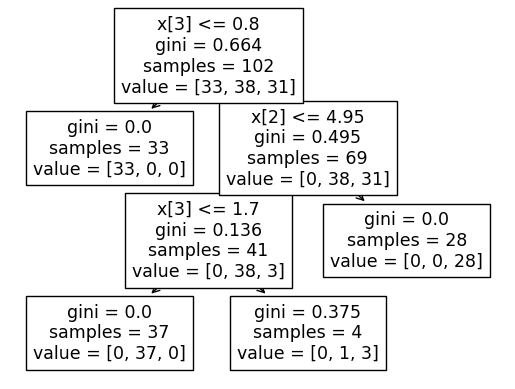

In [22]:
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train,y_train)
ypred_dt=dtc.predict(x_test)
eval_model(y_test,ypred_dt)

tree.plot_tree(dtc)
dt_res = model_score(dtc,x_train,x_test,y_train,y_test,'Decision Tree')
dt_res

3. KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
ypred_knn = knn.predict(x_test)
eval_model(y_test,ypred_knn)
knn_res = model_score(knn,x_train,x_test,y_train,y_test,'KNN Classifier')
knn_res

Confusion_Matrix
 [[15  0  0]
 [ 0 11  1]
 [ 0  1 17]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



,Train_Acc,Test_Acc
KNN Classifier,0.990196,0.955556


4.Support Vector Machine

In [24]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(x_train,y_train)
pred_y = model1.predict(x_test)
eval_model(y_test,pred_y)
svm_res = model_score(knn,x_train,x_test,y_train,y_test,'Support Vector Machine')
svm_res

Confusion_Matrix
 [[15  0  0]
 [ 0 12  0]
 [ 0  3 15]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.80      1.00      0.89        12
 Iris-virginica       1.00      0.83      0.91        18

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.95      0.93      0.93        45



,Train_Acc,Test_Acc
Support Vector Machine,0.990196,0.955556


5.GaussianNB

In [25]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_train)
eval_model(y_test,pred_y)
gnb_res = model_score(knn,x_train,x_test,y_train,y_test,'GaussianNB')
gnb_res

Confusion_Matrix
 [[15  0  0]
 [ 0 12  0]
 [ 0  3 15]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.80      1.00      0.89        12
 Iris-virginica       1.00      0.83      0.91        18

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.95      0.93      0.93        45



,Train_Acc,Test_Acc
GaussianNB,0.990196,0.955556


6. RandomForestClassifier

In [26]:
rf = RandomForestClassifier(n_estimators=75,criterion='gini',max_depth=11,min_samples_split=14)
rf.fit(x_train,y_train)
ypred_rf  = rf.predict(x_test)
eval_model(y_test,ypred_rf)
rf_res = model_score(rf,x_train,x_test,y_train,y_test,'Random Forest')
rf_res

Confusion_Matrix
 [[15  0  0]
 [ 0 10  2]
 [ 0  1 17]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.89      0.94      0.92        18

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



,Train_Acc,Test_Acc
Random Forest,0.990196,0.933333


In [27]:
res = pd.concat([lr_res,dt_res,knn_res,svm_res,gnb_res,rf_res])
res

,Train_Acc,Test_Acc
LogReg,0.980392,0.933333
Decision Tree,0.990196,0.955556
KNN Classifier,0.990196,0.955556
Support Vector Machine,0.990196,0.955556
GaussianNB,0.990196,0.955556
Random Forest,0.990196,0.933333


Save the best model and Load the model

In [28]:
import pickle

In [29]:
from sklearn import metrics
# Load the dataset
dataset = pd.read_csv('C:/Users/DELL/Downloads/IRIS Flower.csv')
# Split the dataset into (X) and target (y)
x = dataset.drop('species', axis=1)
y = dataset['species']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Random forest classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

# Make predictions on the test
y_pred = classifier.predict(x_test)

# Evaluate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

###### Save the model
pickle.dump(classifier,open('rf_model_of_IRIS_proj.pkl','wb'))

###### Load the model
model = pickle.load(open('rf_model_of_IRIS_proj.pkl','rb'))

# Make predictions using the loaded model
new_predictions = model.predict(x_test)

# Evaluate the loaded model
loaded_accuracy = metrics.accuracy_score(y_test, new_predictions)
print("Accuracy of the loaded model:", loaded_accuracy)

Accuracy: 1.0
Accuracy of the loaded model: 1.0
